In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [2]:
train_data = pd.read_csv('E:/Chapter/MNIST_CSV/mnist_train.csv')
print("Shape of train_data:", train_data.shape)


X = train_data.iloc[:, 1:]  
y = train_data.iloc[:, 0]   

print("Shape of X after separating features:", X.shape)

Shape of train_data: (59999, 785)
Shape of X after separating features: (59999, 784)


In [3]:
if not isinstance(X, pd.DataFrame):
    X = pd.DataFrame(X)
X = X.apply(pd.to_numeric, errors='coerce')
X = X.fillna(0)  
X = X.values / 255.0
X = X.reshape(-1, 28, 28, 1)
print("Shape of X after reshaping:", X.shape)

Shape of X after reshaping: (59999, 28, 28, 1)


In [4]:
y = to_categorical(y, num_classes=10)
print("Shape of y after one-hot encoding:", y.shape)

Shape of y after one-hot encoding: (59999, 10)


In [5]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)

X_train shape: (47999, 28, 28, 1)


### Defining the layers for NN

In [6]:
model = Sequential([
    Input(shape=(28, 28, 1)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9213 - loss: 0.2668 - val_accuracy: 0.9532 - val_loss: 0.1535
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9653 - loss: 0.1117 - val_accuracy: 0.9639 - val_loss: 0.1151
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9773 - loss: 0.0743 - val_accuracy: 0.9676 - val_loss: 0.1062
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9812 - loss: 0.0587 - val_accuracy: 0.9678 - val_loss: 0.1079
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9861 - loss: 0.0437 - val_accuracy: 0.9741 - val_loss: 0.0909
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9888 - loss: 0.0351 - val_accuracy: 0.9718 - val_loss: 0.1009
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9918 - loss: 0.0275 - val_accuracy: 0.9748 - val_loss: 0.0932
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9919 - loss: 0.0242 - 

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - accuracy: 0.9756 - loss: 0.1054
Validation Accuracy: 97.56%


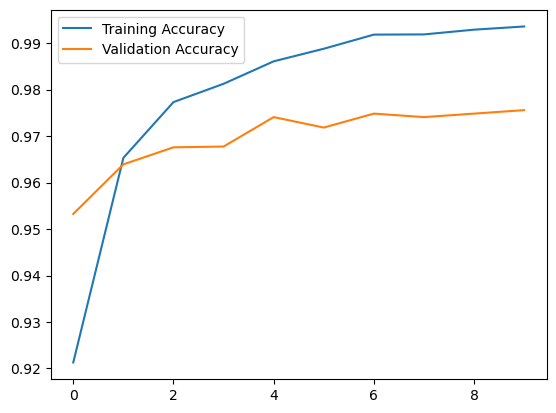

In [8]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

Shape of CSV: (59999, 785)
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 624us/step


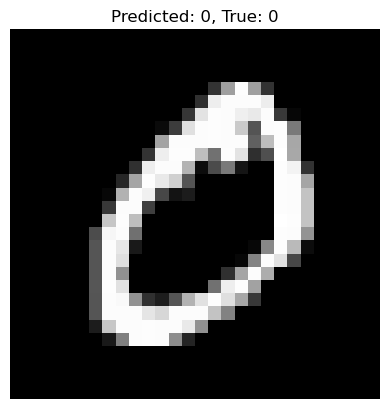

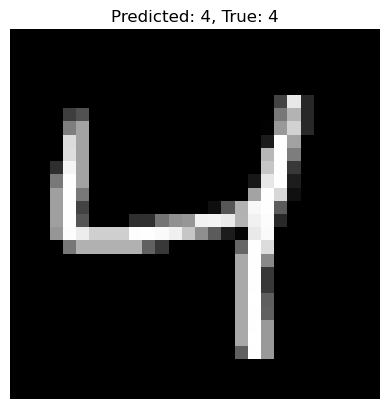

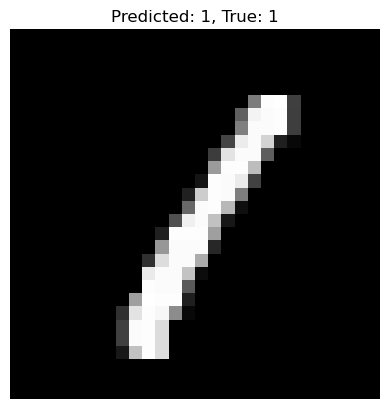

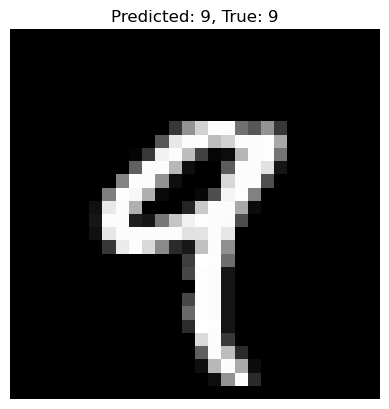

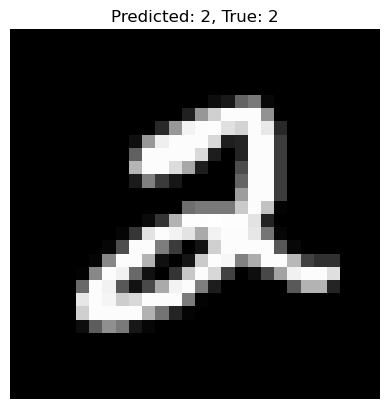

In [18]:
# Load CSV
test_data = pd.read_csv('E:/Chapter/MNIST_CSV/mnist_train.csv')
print("Shape of CSV:", test_data.shape)

# Split labels and images
y_test = test_data.iloc[:, 0].values           # labels
X_test = test_data.iloc[:, 1:].values          # pixel values only

# Normalize pixel values
X_test = X_test / 255.0

# Reshape into (num_samples, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Predict
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# Show first 5 samples with predictions
for i in range(5):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}, True: {y_test[i]}")
    plt.axis('off')
    plt.show()

In [19]:
model.save("mnist_model.h5")

### Trained Mnist model in real time using webcam 

In [20]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

model = load_model("mnist_model.h5")
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    roi = cv2.resize(gray, (28, 28))  # just resizing full frame for demo
    roi = roi / 255.0
    roi = roi.reshape(1, 28, 28, 1)
    
    pred = np.argmax(model.predict(roi))
    cv2.putText(frame, f"Prediction: {pred}", (10, 50),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    
    cv2.imshow("Digit Recognition", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━

### Pytorch GPU/cuda implementation -----

Using device: cuda
Shape of train_data: (59999, 785)
Training set: (47999, 1, 28, 28) Validation set: (12000, 1, 28, 28)
MNISTModel(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (relu): ReLU()
  (softmax): Softmax(dim=1)
)
Epoch [1/10], Loss: 0.3084, Train Acc: 0.9121, Val Acc: 0.9487
Epoch [2/10], Loss: 0.1279, Train Acc: 0.9617, Val Acc: 0.9591
Epoch [3/10], Loss: 0.0878, Train Acc: 0.9730, Val Acc: 0.9644
Epoch [4/10], Loss: 0.0655, Train Acc: 0.9799, Val Acc: 0.9682
Epoch [5/10], Loss: 0.0492, Train Acc: 0.9845, Val Acc: 0.9709
Epoch [6/10], Loss: 0.0402, Train Acc: 0.9872, Val Acc: 0.9688
Epoch [7/10], Loss: 0.0324, Train Acc: 0.9897, Val Acc: 0.9714
Epoch [8/10], Loss: 0.0266, Train Acc: 0.9912, Val Acc: 0.9716
Epoch [9/10], Loss: 0.0233, Train Acc: 0.9923, Val Acc: 0.9745
Epoch [10/10], Loss: 0.0

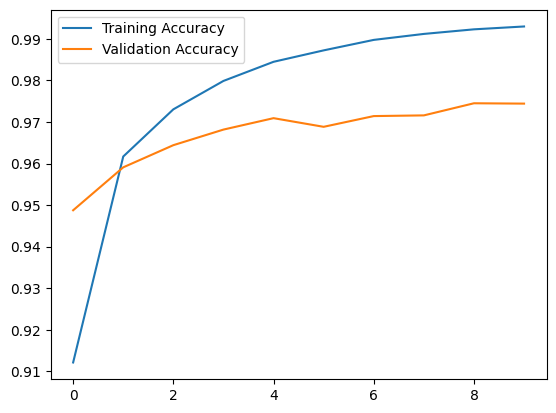

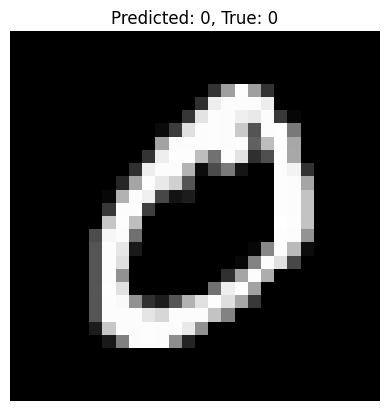

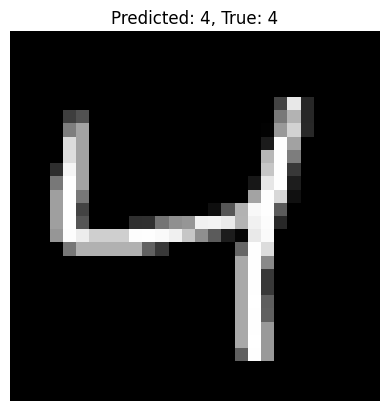

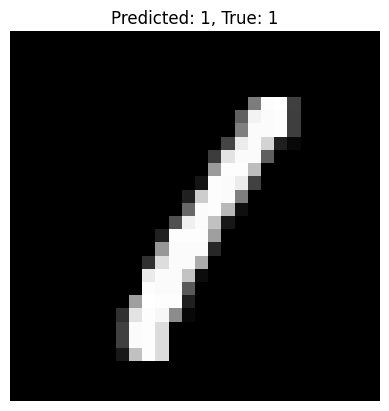

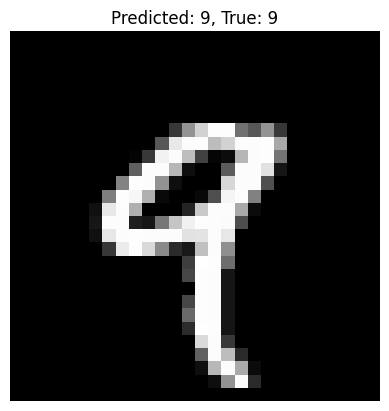

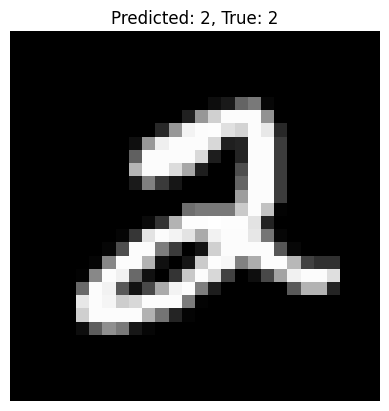

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# === Load and preprocess data ===
train_data = pd.read_csv('E:/Chapter/MNIST_CSV/mnist_train.csv')
print("Shape of train_data:", train_data.shape)

# Split into features and labels
X = train_data.iloc[:, 1:].values.astype(np.float32) / 255.0
y = train_data.iloc[:, 0].values.astype(np.int64)

# Reshape for PyTorch (N, 1, 28, 28)
X = X.reshape(-1, 1, 28, 28)

# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set:", X_train.shape, "Validation set:", X_val.shape)

# Convert to tensors
X_train_tensor = torch.tensor(X_train)
y_train_tensor = torch.tensor(y_train)
X_val_tensor = torch.tensor(X_val)
y_val_tensor = torch.tensor(y_val)

# Create Datasets and Dataloaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# === Define the model ===
class MNISTModel(nn.Module):
    def __init__(self):
        super(MNISTModel, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x  # logits (no softmax here — CrossEntropyLoss handles it)

model = MNISTModel().to(device)
print(model)

# === Loss and optimizer ===
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# === Training loop ===
num_epochs = 10
train_acc_history, val_acc_history = [], []

for epoch in range(num_epochs):
    model.train()
    total_loss, correct, total = 0, 0, 0
    
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()
    
    train_acc = correct / total
    train_acc_history.append(train_acc)
    
    # Validation
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            _, predicted = torch.max(outputs.data, 1)
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()
    val_acc = correct / total
    val_acc_history.append(val_acc)
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss/len(train_loader):.4f}, "
          f"Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")

# === Plot accuracy ===
plt.plot(train_acc_history, label='Training Accuracy')
plt.plot(val_acc_history, label='Validation Accuracy')
plt.legend()
plt.show()

# === Evaluation on test data ===
test_data = pd.read_csv('E:/Chapter/MNIST_CSV/mnist_train.csv')  # using same file as test for demo
y_test = test_data.iloc[:, 0].values.astype(np.int64)
X_test = test_data.iloc[:, 1:].values.astype(np.float32) / 255.0
X_test = X_test.reshape(-1, 1, 28, 28)
X_test_tensor = torch.tensor(X_test).to(device)

# Predict
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted_labels = torch.max(outputs, 1)
predicted_labels = predicted_labels.cpu().numpy()

# Show first 5 predictions
for i in range(5):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}, True: {y_test[i]}")
    plt.axis('off')
    plt.show()


In [1]:
import torch
print(torch.__version__)
print(torch.version.cuda)
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))


2.5.1+cu121
12.1
True
NVIDIA GeForce RTX 3090
